# Instalação das bibliotecas


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leitura da base de dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto_Modulo6/base_features')
df

,autor,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lmviapiana,2,"['minuto', 'touro', 'ouro']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,perspectiveinvestimentos,2,"['excelente', 'explicação']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9113,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9114,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9115,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Teste isolado

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Exemplo de DataFrame com coluna de texto pré-processado
teste_isolado = pd.DataFrame({'texto': ['Este é um exemplo de texto pré-processado.',
                             'Outro exemplo de texto tratado.',
                             'Mais um texto pré-processado.']})

# Inicializar o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Vetorizar a coluna de texto
vetorizado = tfidf_vectorizer.fit_transform(teste_isolado['texto'])

# Obter os nomes das características
feature_names = tfidf_vectorizer.get_feature_names_out()

# Criar um novo DataFrame com as características vetorizadas
teste_isolado_vetorizado = pd.DataFrame(vetorizado.toarray(), columns=feature_names)

# Concatenar o DataFrame vetorizado com o DataFrame original
teste_isolado_final = pd.concat([teste_isolado, teste_isolado_vetorizado], axis=1)

# Exibir o DataFrame final
display(teste_isolado_final)

,texto,de,este,exemplo,mais,outro,processado,pré,texto,tratado,um
0,Este é um exemplo de texto pré-processado.,0.369308,0.485596,0.369308,0.000000,0.000000,0.369308,0.369308,0.286801,0.000000,0.369308
1,Outro exemplo de texto tratado.,0.406192,0.000000,0.406192,0.000000,0.534093,0.000000,0.000000,0.315444,0.534093,0.000000
2,Mais um texto pré-processado.,0.000000,0.000000,0.000000,0.569431,0.000000,0.433067,0.433067,0.336315,0.000000,0.433067


# Modelo de vetorização - TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

vetorizado = tfidf_vectorizer.fit_transform(df['texto_tratado'])

feature_names = tfidf_vectorizer.get_feature_names_out()

df_vetorizado = pd.DataFrame(vetorizado.toarray(), columns=feature_names)
df_vetorizado = df_vetorizado.drop(columns=['sentimento'])

df_final = pd.concat([df, df_vetorizado], axis=1)

In [ ]:
df_final

,autor,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,𝚜𝚎𝚛,𝚜𝚎𝚞𝚜,𝚜𝚞𝚊,𝚝𝚎,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo...",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender...",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,lmviapiana,2,"['minuto', 'touro', 'ouro']",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel...",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,perspectiveinvestimentos,2,"['excelente', 'explicação']",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion...",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9115,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o...",0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final['sentimento']

0       1
1       1
2       2
3       2
4       0
       ..
9112    2
9113    2
9114    2
9115    1
9116    0
Name: sentimento, Length: 9117, dtype: int64

# Testes dos valores das colunas

In [ ]:
df_final['ser'].value_counts()

0.000000    9090
0.401623       1
0.088325       1
0.172321       1
0.160585       1
0.141989       1
0.173278       1
0.089949       1
0.072909       1
0.263563       1
0.435368       1
0.064125       1
0.145071       1
0.135044       1
0.132759       1
0.187682       1
0.166435       1
0.284518       1
0.081658       1
0.143941       1
0.147242       1
0.065791       1
0.174078       1
0.142939       1
0.477852       1
0.164340       1
0.160023       1
0.119515       1
Name: ser, dtype: int64

In [ ]:
df_final['aa'].value_counts()

0.000000    9116
0.209435       1
Name: aa, dtype: int64

In [ ]:
df_final['𝚜𝚎𝚞𝚜'].value_counts()

0.00000    9116
0.13046       1
Name: 𝚜𝚎𝚞𝚜, dtype: int64

# 1º Modelo Naive Bayes com Glove


*   Recall clase 0 = 75%
*   Recall Total = 53%
*   Acurácia = 50%






In [ ]:
target = df_final['sentimento']
target

0       1
1       1
2       2
3       2
4       0
       ..
9112    2
9113    2
9114    2
9115    1
9116    0
Name: sentimento, Length: 9117, dtype: int64

In [ ]:
feature = df_final.iloc[:,3:df_final.shape[1]]

In [ ]:
feature

,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,aliviado,satisfeito,...,𝚜𝚎𝚛,𝚜𝚎𝚞𝚜,𝚜𝚞𝚊,𝚝𝚎,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎
0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9115,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.shape

(9117, 19108)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
y_train

2986    1
3290    1
4626    1
8732    2
6568    1
       ..
5734    1
5191    1
5390    1
860     0
7270    2
Name: sentimento, Length: 7293, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.31      0.75      0.44       396
           1       0.62      0.24      0.35       809
           2       0.58      0.51      0.54       619

    accuracy                           0.44      1824
   macro avg       0.50      0.50      0.44      1824
weighted avg       0.54      0.44      0.43      1824



In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output)

Precisão final de : 44.24%


# 2º Modelo Random Forest com TFIDF

*   Recall clase 0 = 58%
*   Recall Total = 68%
*   Acurácia = 70%

In [ ]:
target = df_final['sentimento']
feature = df_final.iloc[:,3:df_final.shape[1]]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Construir o modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Treinar o modelo
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
# Aplicar a validação cruzada
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)  # cv=5 indica 5 folds de validação cruzada

# Imprimir os scores de validação cruzada
print("Scores de validação cruzada:", cv_scores)
print("Média dos scores:", np.mean(cv_scores))

Scores de validação cruzada: [0.72858122 0.72515422 0.70733379 0.71124829 0.70781893]
Média dos scores: 0.7160272881720855


In [ ]:
# Avaliar o modelo
y_pred = model_rf.predict(X_test)

# Gerar o relatório de classificação
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       396
           1       0.72      0.79      0.76       809
           2       0.71      0.69      0.70       619

    accuracy                           0.72      1824
   macro avg       0.72      0.70      0.71      1824
weighted avg       0.72      0.72      0.72      1824



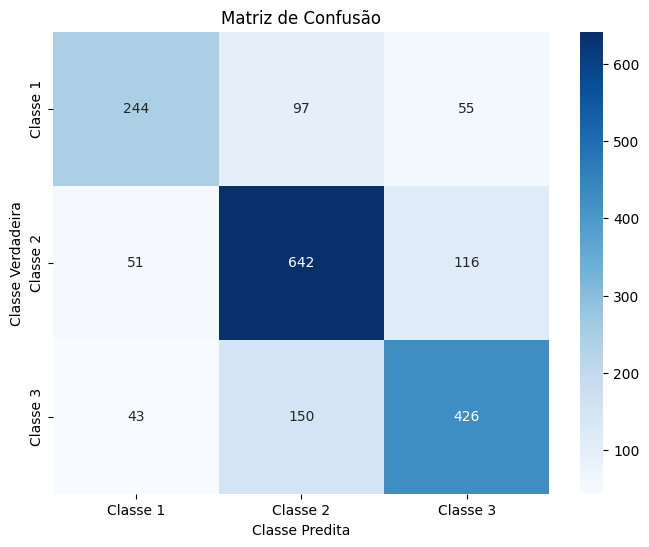

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Definir as classes
classes = ['Classe 1', 'Classe 2', 'Classe 3']

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Modelo Rede Neural (Sequência de palavras)

In [ ]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=48039bc92841343377e23d983472d3231b93186c7bd95be5f4ec42ff6a21bde2
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences
import seaborn as sns
citacao = [
    "Estudo no Inteli e escolhi o curso de Sistemas de Informação",
    "Estamos fazendo um projeto para o BTG",
    "Estamos no segundo ano de graduação",
    "Somos do grupo BTG3"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(citacao)
citacao_token = tokenizer.texts_to_sequences(citacao)

max_length = max([len(z) for z in citacao_token]) + 1
citacao_pad = pad_sequences(citacao_token, maxlen=max_length, padding="post")

In [ ]:
rede_neural_df = pd.read_csv("/content/drive/MyDrive/Projeto_Modulo6/base_features")

In [ ]:
rede_neural_df

,autor,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lmviapiana,2,"['minuto', 'touro', 'ouro']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,perspectiveinvestimentos,2,"['excelente', 'explicação']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9113,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9114,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9115,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x, y = rede_neural_df["texto_tratado"], rede_neural_df["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma',
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das',
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos',
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma',
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))

Tamanho de x: 9117
Tamanho de y: 9117


In [ ]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_rede_neural_df = Sequential()
model_rede_neural_df.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_rede_neural_df.add(GlobalMaxPooling1D())
model_rede_neural_df.add(Dropout(0.3))
model_rede_neural_df.add(Dense(units=3, activation='softmax'))

model_rede_neural_df.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_rede_neural_df.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=4, callbacks=[mc])

print(model_rede_neural_df.evaluate(x_test, y_test))

Epoch 1/4
190/191 [============================>.] - ETA: 0s - loss: 0.9956 - recall: 1.2320

191/191 [==============================] - 10s 45ms/step - loss: 0.9956 - recall: 1.2327 - val_loss: 0.9035 - val_recall: 1.2038
Epoch 2/4
189/191 [============================>.] - ETA: 0s - loss: 0.8219 - recall: 1.2240

191/191 [==============================] - 5s 27ms/step - loss: 0.8204 - recall: 1.2229 - val_loss: 0.7879 - val_recall: 1.2242
Epoch 3/4
190/191 [============================>.] - ETA: 0s - loss: 0.6898 - recall: 1.2184

191/191 [==============================] - 5s 26ms/step - loss: 0.6903 - recall: 1.2194 - val_loss: 0.7277 - val_recall: 1.2022
Epoch 4/4
191/191 [==============================] - ETA: 0s - loss: 0.5886 - recall: 1.1966

95/95 [==============================] - 0s 2ms/step - loss: 0.6916 - recall: 1.1500
[0.6915552020072937, 1.1500380039215088]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = model_rede_neural_df.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

95/95 [==============================] - 0s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       647
           1       0.75      0.73      0.74      1322
           2       0.71      0.70      0.70      1040

    accuracy                           0.71      3009
   macro avg       0.69      0.70      0.70      3009
weighted avg       0.71      0.71      0.71      3009



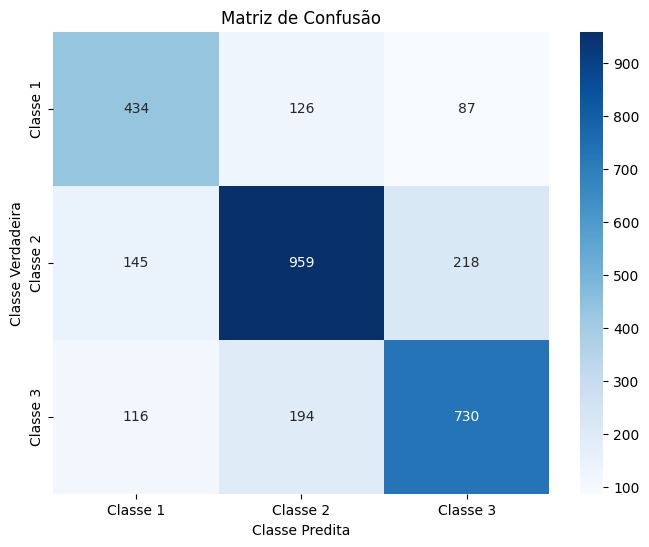

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()